X boyutu: (2527, 224, 224, 3)
Label Sınıf Sayısı: 6 Gözlem sayısı: 2527
Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (

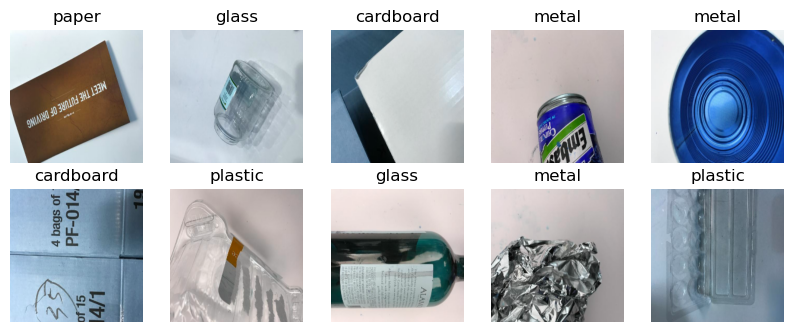

In [101]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Veri yolu
dir_path = "Garbage classification"
target_size = (224, 224)

# Etiketler ve sınıflar
waste_labels = {"cardboard": 0, "glass": 1, "metal": 2, "paper": 3, "plastic": 4, "trash": 5}

# Veri setini yükleme ve karıştırma
def load_dataset(path):
    x = []
    labels = []
    image_paths = sorted(os.listdir(path))
    for label in os.listdir(path):
        label_path = os.path.join(path, label)
        for image_file in os.listdir(label_path):
            img_path = os.path.join(label_path, image_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, target_size)
            x.append(img)
            labels.append(waste_labels[label])
    x, labels = shuffle(x, labels, random_state=42)
    print(f"X boyutu: {np.array(x).shape}")
    print(f"Label Sınıf Sayısı: {len(np.unique(labels))} Gözlem sayısı: {len(labels)}")
    return x, labels

# Veriyi yükle
x, labels = load_dataset(dir_path)

# Veri görselleştirme
def visualize_img(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        ax = plt.subplot(5, 5, i + 1)  
        plt.imshow(image_batch[i])  
        plt.title(list(waste_labels.keys())[label_batch[i]]) 
        plt.axis('off')

visualize_img(x, labels)

# Veriyi hazırlama
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    directory=dir_path,
    target_size=target_size,
    class_mode="categorical",
    subset="training"
)

test_generator = test_datagen.flow_from_directory(
    directory=dir_path,
    target_size=target_size,
    batch_size=251,
    class_mode="categorical",
    subset="validation"
)

# Modelleme
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", input_shape=(target_size[0], target_size[1], 3), activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=len(waste_labels), activation="softmax"))

# Model özeti
model.summary()

# Optimizasyon ve değerlendirme metriklerinin ayarlanması
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Eğitim ve değerlendirme
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[],
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)


## Model Değerlendirme

In [103]:
loss ,precision,recall,acc = model.evaluate(test_generator,batch_size=32)

1/1 [==============================] - 2s 2s/step - loss: 1.2046 - accuracy: 0.4940


ValueError: not enough values to unpack (expected 4, got 2)